In [10]:
import torch
import sys
sys.path.append('../vega/')
import vega

#from vega import VEGA
#from utils import *
#from learning_utils import *
import scanpy as sc
import scvi
from scipy import sparse
from sklearn import preprocessing
import numpy as np

# Plotting params
import matplotlib.pyplot as plt
import matplotlib
path_to_save = '../paper/figures/vega_scvi/'
if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)
font = {'family' : 'Arial',
        'size'   : 14}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = .5
matplotlib.rcParams['lines.linewidth'] = .5
matplotlib.rcParams['patch.linewidth'] = .5
matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
# Scanpy figures params
sc.set_figure_params(dpi_save=300)
sc.settings.figdir = path_to_save

In [3]:
# Reload model and data
model = vega.vega_count.VegaSCVI.load('../trained_models/kang_trained_nb/', use_gpu=False)

INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 29065 cells, 7000 vars, 1 batches,
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


In [4]:
latent = model.get_latent_representation()
adata = model.adata
adata.obsm['X_vega'] = latent

In [8]:
adata.obs['Interferon signaling'] = adata.obsm['X_vega'][:,list(adata.uns['_vega']['gmv_names']).index('REACTOME_INTERFERON_SIGNALING')]

In [5]:
# use VEGA latent space for UMAP generation
sc.pp.neighbors(adata, use_rep="X_vega", knn=15)
sc.tl.umap(adata, min_dist=0.5)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


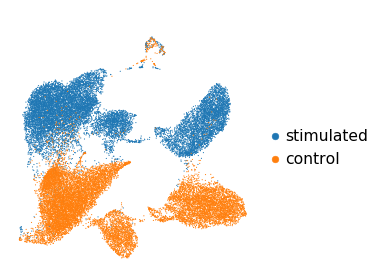

In [11]:
sc.pl.umap(adata, color=['condition'], frameon=False, legend_fontsize=14, title=' ', save='_condition.pdf')

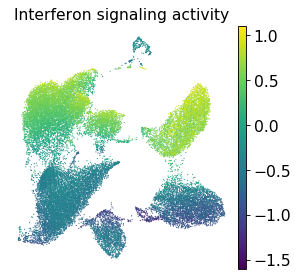

In [13]:
sc.pl.umap(adata, color='Interferon signaling', cmap='viridis', frameon=False, legend_fontsize=14, title='Interferon signaling activity', save='_interferon.pdf')